The method is used mainly when the distribution of data is **skewed**.

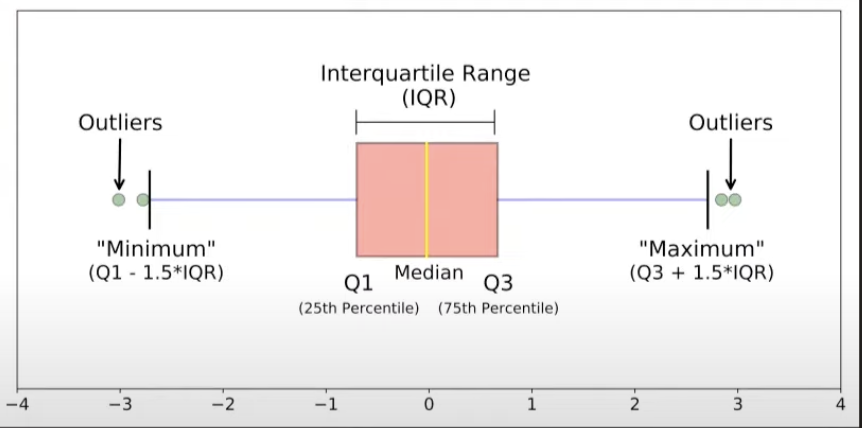

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("placement.csv")

In [3]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


/var/folders/_m/_0hzmbf1467gxwxv0b95v6_80000gn/T/ipykernel_79087/316248929.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
/var/folders/_m/_0hzmbf1467gxwxv0b95v6_80000gn/T/ipykernel_79087/316248929.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


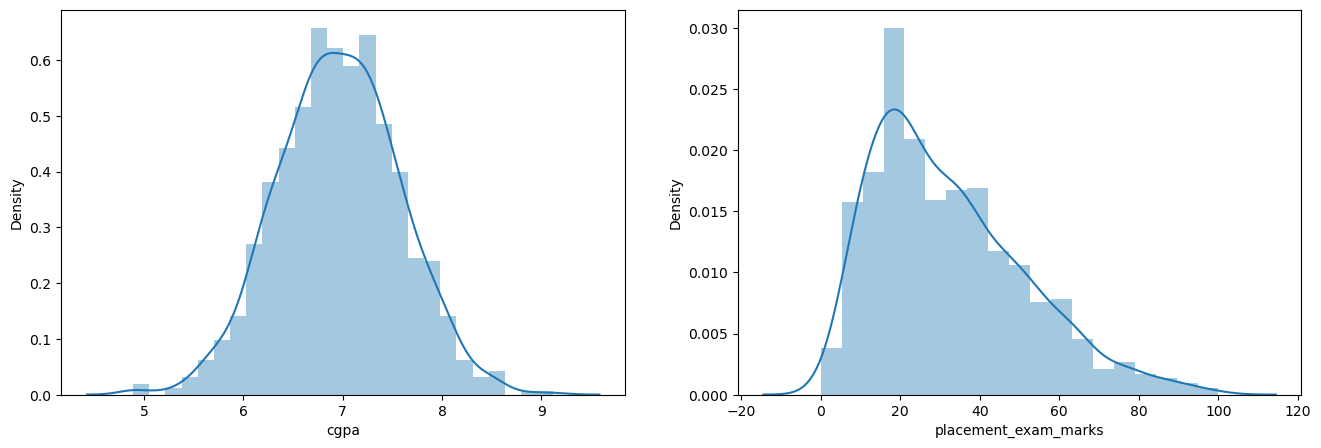

In [4]:
plt.figure(figsize = (16, 5))
plt.subplot(1, 2, 1)
sns.distplot(df['cgpa'])

plt.subplot(1, 2, 2)
sns.distplot(df['placement_exam_marks'])

plt.show()

Based on the above distribution we can conlude that the placement_exam_marks column is right skewed.

In [6]:
df['placement_exam_marks'].skew()

0.8356419499466834

In [8]:
df['cgpa'].skew()

-0.014529938929314918

In [9]:
print("placement_exam_marks")

print("mean", df['placement_exam_marks'].mean())
print("Std", df['placement_exam_marks'].std())
print("Min", df['placement_exam_marks'].min())
print("Max", df['placement_exam_marks'].max())

placement_exam_marks
mean 32.225
Std 19.13082233892108
Min 0.0
Max 100.0


In [10]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: >

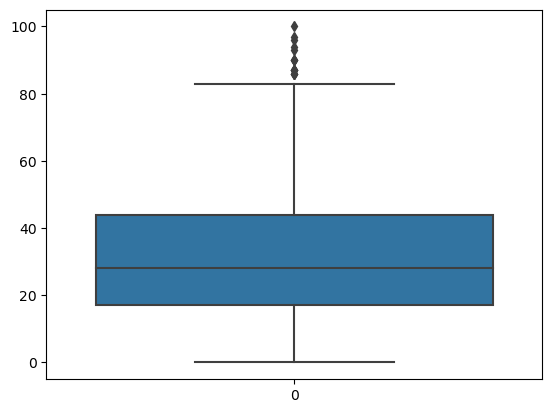

In [11]:
sns.boxplot(df['placement_exam_marks'])

In [12]:
# Finding the IOR
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [13]:
percentile25

17.0

In [14]:
percentile75

44.0

In [15]:
IQR = percentile75 - percentile25

In [16]:
IQR

27.0

In [17]:
upper_limit = percentile75 + 1.5 * IQR
lower_limit = percentile25 - 1.5 * IQR

In [18]:
upper_limit

84.5

# Finding Outliers

In [21]:
df[(df['placement_exam_marks'] > upper_limit) | (df['placement_exam_marks'] < lower_limit)]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


## Trimming

In [22]:
new_df = df[df['placement_exam_marks'] < upper_limit]

/var/folders/_m/_0hzmbf1467gxwxv0b95v6_80000gn/T/ipykernel_79087/269398056.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
/var/folders/_m/_0hzmbf1467gxwxv0b95v6_80000gn/T/ipykernel_79087/269398056.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_

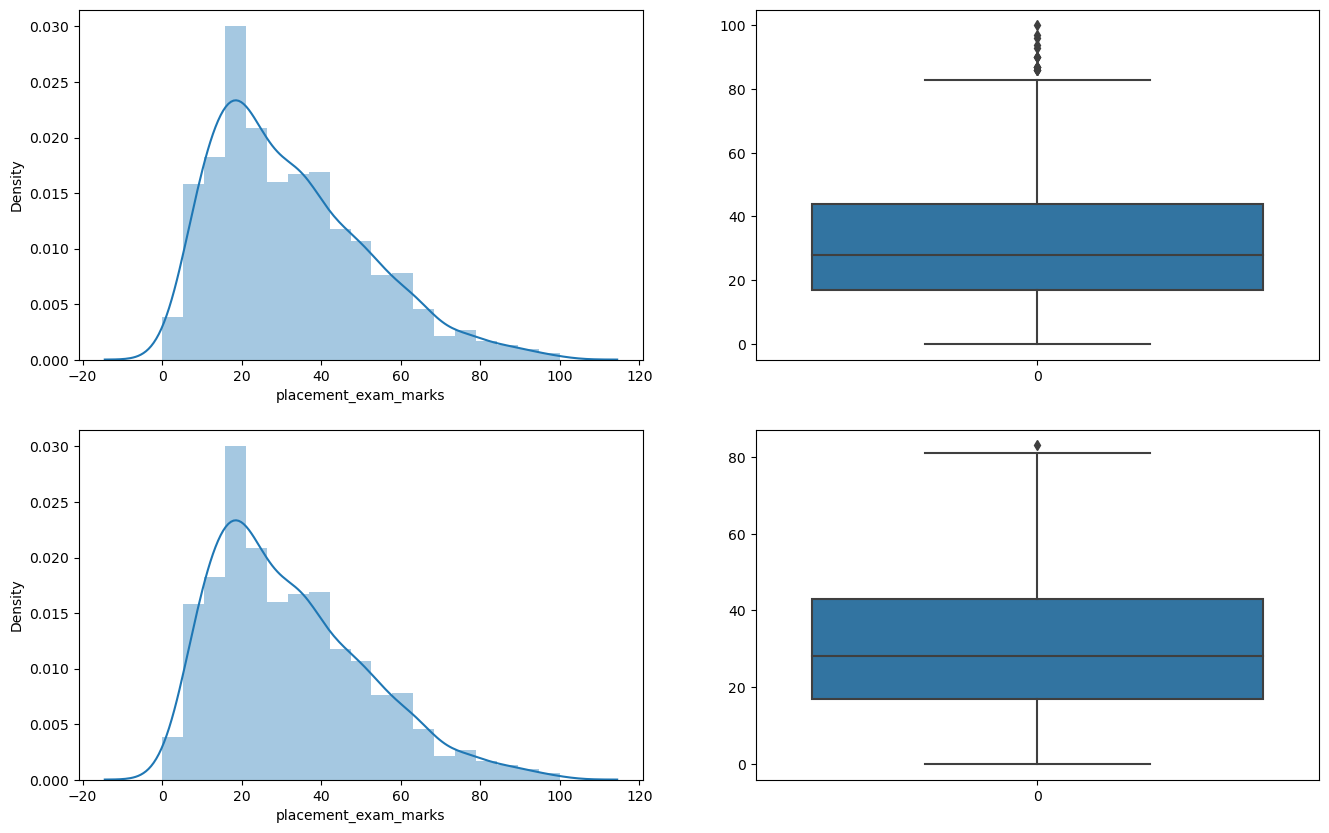

In [24]:
plt.figure(figsize = (16, 10))
plt.subplot(2, 2, 1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2, 2, 2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2, 2, 3)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2, 2, 4)
sns.boxplot(new_df['placement_exam_marks'])

plt.show()

## Capping

In [29]:
new_df_capping = df.copy()
new_df_capping['placement_exam_marks'] = np.where(new_df_capping['placement_exam_marks'] > upper_limit,
                                                  upper_limit,
                     np.where(new_df_capping['placement_exam_marks'] < lower_limit,
                              lower_limit,
                              new_df_capping['placement_exam_marks']))

In [30]:
new_df_capping.shape

(1000, 3)

/var/folders/_m/_0hzmbf1467gxwxv0b95v6_80000gn/T/ipykernel_79087/4520467.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
/var/folders/_m/_0hzmbf1467gxwxv0b95v6_80000gn/T/ipykernel_79087/4520467.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_capping['pl

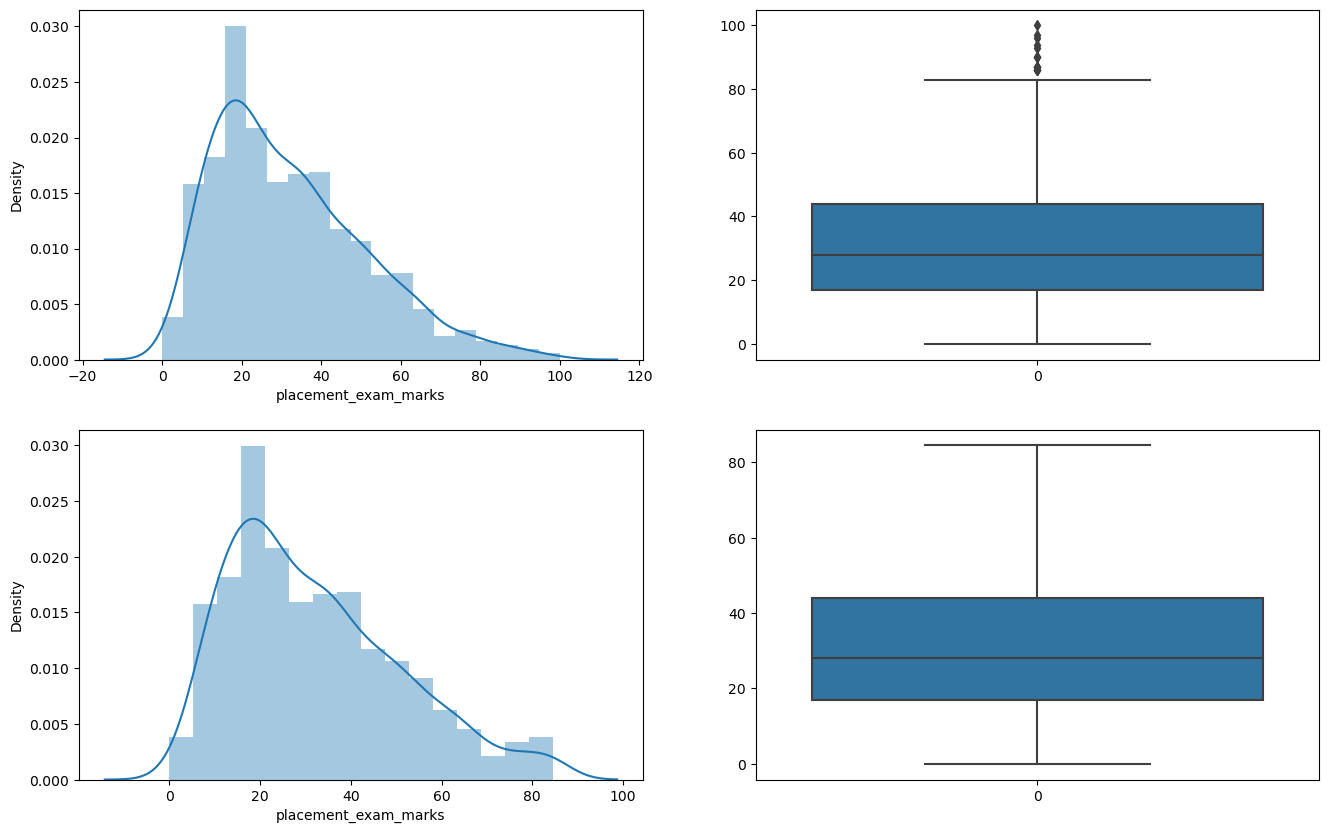

In [31]:
plt.figure(figsize = (16, 10))
plt.subplot(2, 2, 1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2, 2, 2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2, 2, 3)
sns.distplot(new_df_capping['placement_exam_marks'])

plt.subplot(2, 2, 4)
sns.boxplot(new_df_capping['placement_exam_marks'])

plt.show()